In [1]:
import time
import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.nn import functional

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
seed=42
lr=0.1
epochs=30
batch_size=32
features=784
num_classes=10

In [4]:
train_dataset=datasets.MNIST(root='data', train=True, transform=transforms.ToTensor(),download=True)

In [5]:
test_dataset=datasets.MNIST(root='data', train=False, transform=transforms.ToTensor(),download=True)

In [ ]:
train_loader=DataLoader(dataset=train_dataset, batch_size=256,shuffle=True)
test_loader=DataLoader(dataset=test_dataset, batch_size=256,shuffle=False)

In [7]:
for images, labels in train_loader:
    print("Image dimensions: ",images.shape), # batch size, color chanel, size(h,w)
    print("Labels dimensions: ",labels.shape)   
    break

Image dimensions:  torch.Size([32, 1, 28, 28])
Labels dimensions:  torch.Size([32])


In [25]:
class Softmax_regression(torch.nn.Module):
    def __init__(self, num_features=784, classes=10):
        super(Softmax_regression, self).__init__()
        self.layer=torch.nn.Linear(num_features,classes)
        self.classes=classes
        self.layer.weight.detach().zero_()
        self.layer.bias.detach().zero_()
    
    def forward(self, x):
        logits=self.layer(x)
        probs=functional.softmax(logits, dim=1)
        return logits,probs
    

def accuracy(model, data_loader):
    correct_pred, num_examples = 0, 0
    for features, targets in data_loader:
        features = features.view(-1, 28*28).to(device)
        targets = targets.to(device)
        _,probas = model(features)
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
        
    return correct_pred.float() / num_examples * 100

In [26]:
start=time.time()
def train(model, epochs=10, lr=0.01):
    loss_per_epoch=[]
    optimizer = torch.optim.SGD(model.parameters(), lr=lr) 
    total_batches=len(train_dataset)/256
    for e in range(epochs):
        avg_loss=0
        for batch_indice, (features, targets) in enumerate(train_loader):
            X = features.view(-1, 28*28).to(device)
            y = targets.to(device)
            logits,y_pred=model(X)
            loss=functional.cross_entropy(logits, y)
            optimizer.zero_grad()
            loss.backward()
            avg_loss+=loss
            optimizer.step()
            if not batch_indice % 50:
                print (f"Epoch: {e}/ {epochs} | Batch: {batch_indice} / {total_batches}  | Cost: {loss:.4f}")
        with torch.no_grad():
            avg_loss = avg_loss/len(train_dataset)
            loss_per_epoch.append(avg_loss)
            acc=accuracy(model, train_loader)
            print(f"Epoch: {e}/{epochs} training accuracy: {acc:.4f}")
        print("Time elapsed: ",time.time()-start)
            
    return loss_per_epoch

In [28]:
%%time
model=Softmax_regression().to(device)

loss=train(model, epochs=5, lr=0.01)

Epoch: 0/ 5 | Batch: 0 / 234.375  | Cost: 2.3026
Epoch: 0/ 5 | Batch: 50 / 234.375  | Cost: 1.8287
Epoch: 0/ 5 | Batch: 100 / 234.375  | Cost: 1.4694
Epoch: 0/ 5 | Batch: 150 / 234.375  | Cost: 1.2723
Epoch: 0/ 5 | Batch: 200 / 234.375  | Cost: 1.0690
Epoch: 0/ 5 | Batch: 250 / 234.375  | Cost: 1.0817
Epoch: 0/ 5 | Batch: 300 / 234.375  | Cost: 0.9269
Epoch: 0/ 5 | Batch: 350 / 234.375  | Cost: 0.9552
Epoch: 0/ 5 | Batch: 400 / 234.375  | Cost: 0.9312
Epoch: 0/ 5 | Batch: 450 / 234.375  | Cost: 0.7842
Epoch: 0/ 5 | Batch: 500 / 234.375  | Cost: 0.7932
Epoch: 0/ 5 | Batch: 550 / 234.375  | Cost: 0.8909
Epoch: 0/ 5 | Batch: 600 / 234.375  | Cost: 0.5748
Epoch: 0/ 5 | Batch: 650 / 234.375  | Cost: 0.6739
Epoch: 0/ 5 | Batch: 700 / 234.375  | Cost: 0.5655
Epoch: 0/ 5 | Batch: 750 / 234.375  | Cost: 0.6797
Epoch: 0/ 5 | Batch: 800 / 234.375  | Cost: 0.5344
Epoch: 0/ 5 | Batch: 850 / 234.375  | Cost: 0.5502
Epoch: 0/ 5 | Batch: 900 / 234.375  | Cost: 0.5133
Epoch: 0/ 5 | Batch: 950 / 234.375

In [31]:
import matplotlib.pyplot as plt

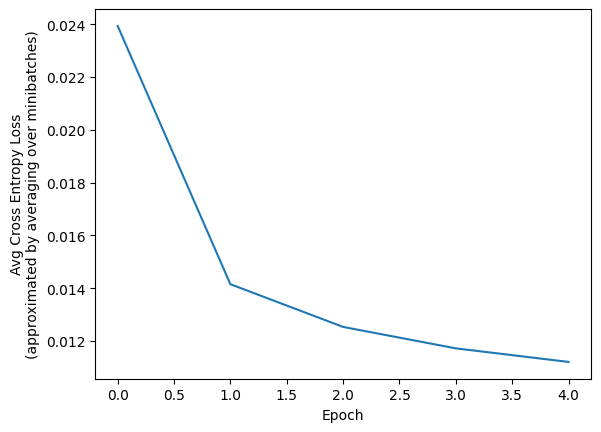

In [39]:
simple_list = [t.item() for t in loss]
plt.plot(simple_list)
plt.ylabel('Avg Cross Entropy Loss\n(approximated by averaging over minibatches)')
plt.xlabel('Epoch')
plt.show()

In [41]:
print('Test accuracy: %.2f%%' % (accuracy(model, test_loader)))

Test accuracy: 90.87%
